# Analyse des ventes de la librairie Lapage

## 1. l'instalation des librairies nécessaires 
 Numpy:  destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.

In [1]:
import numpy as np

In [2]:
import pandas as pd

Matplotlib : destinée à tracer et visualiser des données sous formes de graphiques.

In [3]:
import matplotlib.pyplot as plt

In [4]:
import datetime
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import levene
from scipy.stats import shapiro

In [5]:
# Création d'une fonction pour vérifier, lors d'une marginjointure à gauche, si les 'id' des 2 Df peuvent être utiliser 
# Df[x]<--Df[y]

# Soient x et y 2 listes issues de 2 Df 
# cette fonction doit être utilisées avec x=df1[x] comme entrée, où df1 la df à gauche, càd qu'il y a surement des répétitions
# sur df1, on cherche à reccuperer les valeurs qui sont dans df1 mais pas df2, sur une jointure à gauche elle produiront des
# valeurs nulles
 

def fonct_id(x,y):
    
    
    list_x=(x.unique()).tolist()
    list_y=(y.unique()).tolist()
    
    print("Préparation pour une jointure à gauche df[x] <--df[y]")
    print("Nombre de valeur unique de df[x]:",len(list_x))
    print("Nombre de valeur unique de df[y]:",len(list_y))
    
    a=set(list_x) & set(list_y)
    b=set(list_x)^a
    print("les id suivants ne sont pas dans le Df de droite df[y] et produiront donc des valeurs nulles lors de la jointure :\n",b)


## 2.Importation des fichier csv 

Un fichier costumers.csv contenant les informations des clients : id du client, son sex et sa date de naissance 

In [6]:
client = pd.read_csv('/Users/fabienmirosa/Desktop/Data Analys Safae/DAN-P6-donnees/customers.csv', sep=',')

Un fichier products.csv contenant les informations des produits : id du produit, son prix et sa catégorie

In [7]:
produit = pd.read_csv('/Users/fabienmirosa/Desktop/Data Analys Safae/DAN-P6-donnees/products.csv', sep=',')

Un fichier transactions.csv contenant les informations des transaction : le produit, la date de la transaction, le client qui a fait l'achat et la session.

In [8]:
transaction = pd.read_csv('/Users/fabienmirosa/Desktop/Data Analys Safae/DAN-P6-donnees/transactions.csv', sep=',')

In [9]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [10]:
# ajout d'une nouvelle colonne pour l'âge des clients
client['age'] = 2022 - client['birth']
client.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [11]:
client.describe(include='all')

,client_id,sex,birth,age
count,8623,8623,8623.000000,8623.000000
unique,8623,2,NaN,NaN
top,c_4410,f,NaN,NaN
freq,1,4491,NaN,NaN
mean,NaN,NaN,1978.280877,43.719123
std,NaN,NaN,16.919535,16.919535
min,NaN,NaN,1929.000000,18.000000
25%,NaN,NaN,1966.000000,30.000000
50%,NaN,NaN,1979.000000,43.000000
75%,NaN,NaN,1992.000000,56.000000


In [12]:
client.duplicated().sum()

0

In [13]:
client.nunique()

client_id    8623
sex             2
birth          76
age            76
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

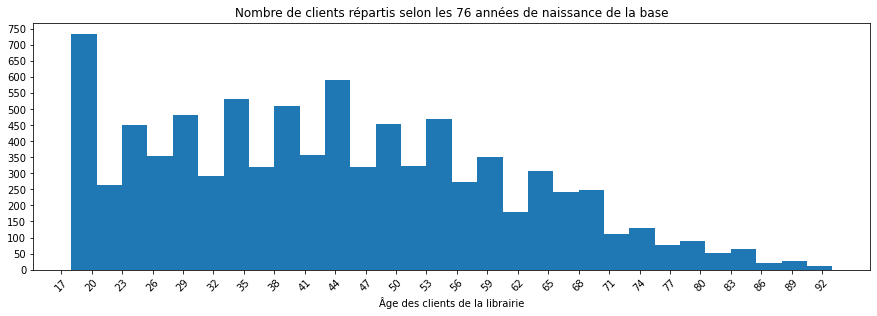

In [14]:
# représentation graphique de la répartition des clients selon leur date de naissance
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.hist(client.age, bins=30)
plt.title("Nombre de clients répartis selon les 76 années de naissance de la base")
plt.xlabel("Âge des clients de la librairie")
plt.yticks(range(0, 751, 50))
plt.xticks(range(17, 95, 3), rotation=45)
plt.grid(axis='y', alpha=0.)
plt.show

Le DataFrame client contient des données cohérentes, aucune valeur nulle ni dupliquée et les dates de naissances sont valides pour des clients nés entre 1929 et 2004 soit entre 17 et 92 ans.

In [15]:
produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [16]:
produit.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


In [17]:
# affichage des produits dont le prix de vente est inférieur ou égal à 0
produit[produit['price']<= 0]

,id_prod,price,categ
731,T_0,-1.0,0


In [18]:
# suppression de l'article dont la référence est T_0 et dont le prix de vente est -1€
produit = produit.drop(produit[produit['price']<0].index, axis=0)

In [19]:
produit.describe(include='all')

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


In [20]:
produit.duplicated().sum()

0

In [21]:
produit.nunique()

id_prod    3286
price      1454
categ         3
dtype: int64

Le DataFrame produit contient des données cohérentes aussi, sans valeur nulle ni dupliquée. Les 3286 références produits sont réparties en 3 catégories avec des prix de vente allant de 0,62€ à 300€; des valeurs assez extrêmes qui sont plausibles pour la vente de livres d'exception ou anciens.

In [22]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


Erreur rencontrée lors de la conversion du type date de la variable date : ValueError: time data test_2021-03-01 02:30:02.237419 doesn't match format specified

In [23]:
# affichage des valeurs de la variable date contenant le mot test
transaction[transaction["date"].str.contains(pat = "test")]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [24]:
# création d'un DataFrame qui recence les 200 lignes qui sont retournées en test dans la variable date
transaction_test = transaction[transaction["date"].str.contains(pat = "test")].copy()

# suppression de ces valeurs dans notre DataFrame transaction
transaction = transaction.drop(transaction_test.index, axis=0)

# modification du type de la variable date
transaction["date"] = pd.to_datetime(transaction["date"], format='%Y-%m-%d %H:%M:%S.%f')

In [25]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [26]:
transaction.describe()

/var/folders/l8/0ypg44717vd7_6qp9nv4mslm0000gn/T/ipykernel_16778/2500851470.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaction.describe()


,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,679332,342315,8600
top,1_369,2022-05-20 13:21:29.043970,s_118668,c_1609
freq,2252,1,14,25488
first,NaN,2021-03-01 00:01:07.843138,NaN,NaN
last,NaN,2023-02-28 23:58:30.792755,NaN,NaN


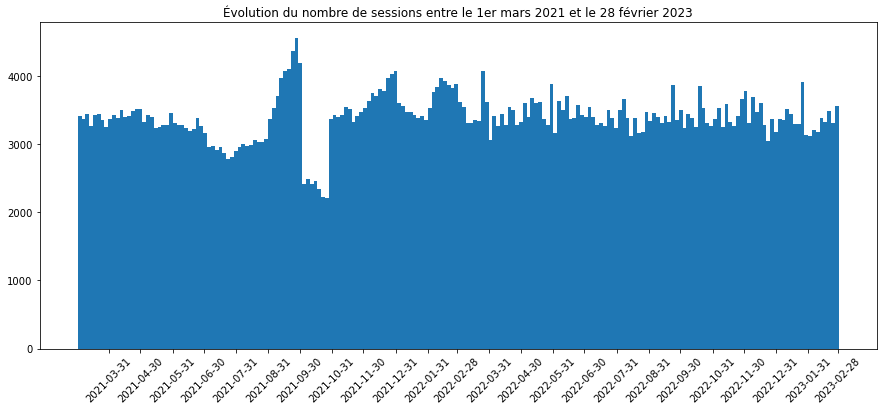

In [27]:
plt.figure(figsize=(15,6))
x = transaction["date"].sort_values().values
plt.hist(x, bins=200)
plt.title("Évolution du nombre de sessions entre le 1er mars 2021 et le 28 février 2023")
plt.xticks(pd.date_range(start=min(transaction["date"]), end=max(transaction["date"]), freq='M'), rotation=45)
plt.show()

## 3.Fusion des 3 DataFrames issus des 3 fichiers csv source

Donc les "client_id" dans 'client' et "id_prod" dans 'produit' peuvent êre considéré comme clé primaire.
### Préparation de la jointure   
la table df_trans contient deux id, id_prod (3 267 valeurs uniques) et client_id (8 602 valeurs uniques).
il faut verifier que ces valeurs aient bien un équivalent dans les tables df_prod (3 287) et df_cust (8 623)


In [28]:
fonct_id(transaction['id_prod'],produit["id_prod"])

Préparation pour une jointure à gauche df[x] <--df[y]
Nombre de valeur unique de df[x]: 3266
Nombre de valeur unique de df[y]: 3286
les id suivants ne sont pas dans le Df de droite df[y] et produiront donc des valeurs nulles lors de la jointure :
 {'0_2245'}


In [29]:
fonct_id(transaction['client_id'],client['client_id'])

Préparation pour une jointure à gauche df[x] <--df[y]
Nombre de valeur unique de df[x]: 8600
Nombre de valeur unique de df[y]: 8623
les id suivants ne sont pas dans le Df de droite df[y] et produiront donc des valeurs nulles lors de la jointure :
 set()


In [30]:
df_produit_manquant = transaction[transaction['id_prod']=='0_2245']

In [31]:
len(df_produit_manquant)

221

##### Conclusion de la préparation de la jointure
il existe 221 lignes pour lesquelles il n'y a pas de référence produit, c'est à dire que pour ces références
il n'existera pas de prix ('price') ou la 'catégorie', on le garde pour l'instant dans le but de faire un imputation (soit par la moyenne ou mediane) apres.

Par contre, pour chaque ligne de la table df_trans j'ai bien une référence client, pour connaitre le sexe et l'année   
de naissance.

In [32]:
# Jointure à gauche entre les DataFrames transaction et client
df = pd.merge(transaction, client, on='client_id' ,how='left')
df

,id_prod,date,session_id,client_id,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42
...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,71
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,45
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,34
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,36


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   age         679332 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 41.5+ MB


In [34]:
df.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
age           0
dtype: int64

In [35]:
# Jointure à gauche entre les DataFrames df et produit
df = pd.merge(df, produit, on='id_prod' ,how='left')
df

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,36,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,m,1988,34,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,f,1968,54,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,m,2000,22,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,m,1980,42,4.99,0.0
...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,f,1951,71,12.99,0.0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,f,1977,45,10.99,1.0
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,f,1988,34,12.99,0.0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,m,1986,36,4.98,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   age         679332 non-null  int64         
 7   price       679111 non-null  float64       
 8   categ       679111 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 51.8+ MB


In [37]:
# recherche de valeurs dupliquées
df.duplicated().sum()

0

In [38]:
# recherche de valeurs nulles
df.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
sex             0
birth           0
age             0
price         221
categ         221
dtype: int64

In [39]:
# On s'interresse aux valeurs du produit "0_2245" dans notre table finale
df_prodnull = df[df['id_prod']=='0_2245']
len(df_prodnull)

221

In [40]:
df_prodnull.head()

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,82,NaN,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,59,NaN,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,44,NaN,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,31,NaN,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,49,NaN,NaN


In [41]:
df.describe()

,birth,age,price,categ
count,679332.000000,679332.000000,679111.000000,679111.000000
mean,1977.811139,44.188861,17.454773,0.441953
std,13.574553,13.574553,18.328998,0.595042
min,1929.000000,18.000000,0.620000,0.000000
25%,1970.000000,35.000000,8.870000,0.000000
50%,1980.000000,42.000000,13.990000,0.000000
75%,1987.000000,52.000000,18.990000,1.000000
max,2004.000000,93.000000,300.000000,2.000000


Imputation par la moyenne pour remplir les cases price pour le produit '0_2245'

In [42]:
df.loc[df.id_prod=='0_2245','price']= (df['price'].mean())

In [43]:
df.loc[df['id_prod']=='0_2245']

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,82,17.454773,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,59,17.454773,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,44,17.454773,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,31,17.454773,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,49,17.454773,NaN
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,m,1981,41,17.454773,NaN
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,f,1979,43,17.454773,NaN
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,m,1981,41,17.454773,NaN
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,m,1986,36,17.454773,NaN


In [44]:
# on crée 3 Df, un pour chaque catégorie  

df_0 =df[df["categ"]=='0']
df_1 =df[df["categ"]=='1']
df_2 =df[df["categ"]=='2']

In [45]:
df_0.describe()

,birth,age,price,categ
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [46]:
df_1.describe()

,birth,age,price,categ
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [47]:
df_2.describe()

,birth,age,price,categ
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


Qu'on impute par la moyenne (ou par la mediane) on auras des prix qui ressemble aux pris de la categorie 1 donc je remplace le "NaN" de 'categ par "1" 

In [48]:
df.loc[df.id_prod=='0_2245','categ']= '1'

In [49]:
df.loc[df['id_prod']=='0_2245']

,id_prod,date,session_id,client_id,sex,birth,age,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,m,1940,82,17.454773,1
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,f,1963,59,17.454773,1
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,m,1978,44,17.454773,1
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,m,1991,31,17.454773,1
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,m,1973,49,17.454773,1
...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,m,1981,41,17.454773,1
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,f,1979,43,17.454773,1
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,m,1981,41,17.454773,1
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,m,1986,36,17.454773,1


In [50]:
# comptabilisation du nombre de valeurs uniques par variable
df.nunique()

id_prod         3266
date          679332
session_id    342315
client_id       8600
sex                2
birth             76
age               76
price           1443
categ              4
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   age         679332 non-null  int64         
 7   price       679332 non-null  float64       
 8   categ       679332 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 51.8+ MB


In [52]:
# réorganisation des colonnes
df = df[["id_prod", "price", "categ", "client_id", "sex", "birth", "age", "session_id", "date"]]

# Modification du type de donnée pour 'categ' de float à integer
df['categ'] = df['categ'].astype(int)

# Renommage de la variable 'date'
df = df.rename({'date':'date_time'}, axis=1)

# Création de nouvelle colonnes associées à la date
df['date'] = pd.to_datetime(df['date_time']).dt.date
df['annee'] = df['date_time'].dt.year.copy()
df['annee_mois'] = df['date_time'].dt.strftime('%Y-%m')

# affichage du DataFrame nettoyé
df

,id_prod,price,categ,client_id,sex,birth,age,session_id,date_time,date,annee,annee_mois
0,0_1518,4.18,0,c_103,f,1986,36,s_211425,2022-05-20 13:21:29.043970,2022-05-20,2022,2022-05
1,1_251,15.99,1,c_8534,m,1988,34,s_158752,2022-02-02 07:55:19.149409,2022-02-02,2022,2022-02
2,0_1277,7.99,0,c_6714,f,1968,54,s_225667,2022-06-18 15:44:33.155329,2022-06-18,2022,2022-06
3,2_209,69.99,2,c_6941,m,2000,22,s_52962,2021-06-24 04:19:29.835891,2021-06-24,2021,2021-06
4,0_1509,4.99,0,c_4232,m,1980,42,s_325227,2023-01-11 08:22:08.194479,2023-01-11,2023,2023-01
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,12.99,0,c_8489,f,1951,71,s_150195,2022-01-15 13:05:06.246925,2022-01-15,2022,2022-01
679328,1_639,10.99,1,c_4370,f,1977,45,s_181434,2022-03-19 16:03:23.429229,2022-03-19,2022,2022-03
679329,0_1425,12.99,0,c_304,f,1988,34,s_314704,2022-12-20 04:33:37.584749,2022-12-20,2022,2022-12
679330,0_1994,4.98,0,c_2227,m,1986,36,s_63204,2021-07-16 20:36:35.350579,2021-07-16,2021,2021-07


## 4.Analyse des indicateurs de vente

### Analyse de chiffre d'affaires :

In [53]:
# chiffre d'affaires cumulé global

print ('Le chiffre d\'affaires cumulé de la librairie en ligne est de','{:.2f}'.format(df['price'].sum()), 'millions d\'euros entre le 1er Mars 2021 et le 28 Février 2023.')

Le chiffre d'affaires cumulé de la librairie en ligne est de 11857586.18 millions d'euros entre le 1er Mars 2021 et le 28 Février 2023.


In [54]:
# évolution du chiffre d'affaires par an et par catégorie
pd.crosstab(index=df['annee'], columns=df['categ'], values=df['price'], aggfunc='sum', margins=True, margins_name='Total').applymap("{0:.2f}".format)

categ,0,1,2,Total
annee,,,,
2021,1883020.45,1779514.42,1109810.26,4772345.13
2022,2192970.46,2487369.76,1430436.16,6110776.38
2023,343740.06,390696.02,240028.60,974464.68
Total,4419730.97,4657580.19,2780275.02,11857586.18


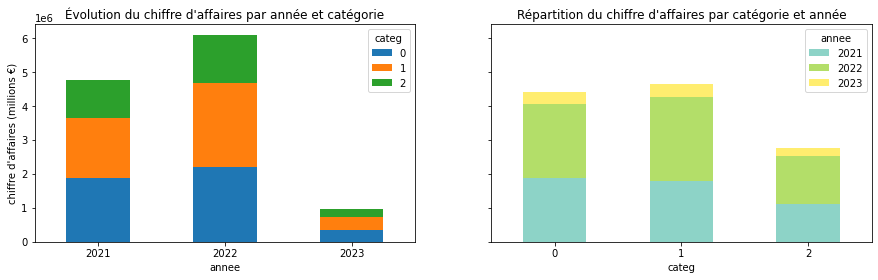

In [55]:
# représentation de l'évolution du chiffre d'affaires par catégorie
cross = pd.crosstab(index=df['annee'], columns=df['categ'], values=df['price'], aggfunc='sum').copy()
cross2 = pd.crosstab(index=df['categ'], columns=df['annee'], values=df['price'], aggfunc='sum').copy()

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,4), sharey=True)

cross.plot(kind='bar', stacked=True, rot=0, ax=ax1)
ax1.set_ylabel("chiffre d'affaires (millions €)")
ax1.set_title("Évolution du chiffre d'affaires par année et catégorie")

cross2.plot(kind='bar', stacked=True, rot=0, ax=ax2, colormap='Set3')
ax2.set_ylabel("chiffre d'affaires (millions €)")
ax2.set_title("Répartition du chiffre d'affaires par catégorie et année")

plt.show()

In [56]:
# analyse du nombre de vente et chiffre d'affaires par année et par catégorie
df1 = df.groupby(['annee', 'categ']).agg({'id_prod':'count', 'price':'sum'}).unstack(level=1).copy()
df1 = df1.rename(columns={'id_prod':'Nombre de produits vendus', 'price': "Chiffre d'affaire réalisé"})
total_df = df1.sum()
df1.loc["total", :] = total_df
df1.applymap("{0:.2f}".format)

Nombre de produits vendus                       \
categ                         0          1         2   
annee                                                  
2021                  176984.00   86803.00  14548.00   
2022                  206152.00  121532.00  18816.00   
2023                   32323.00   19055.00   3119.00   
total                 415459.00  227390.00  36483.00   

      Chiffre d'affaire réalisé                          
categ                         0           1           2  
annee                                                    
2021                 1883020.45  1779514.42  1109810.26  
2022                 2192970.46  2487369.76  1430436.16  
2023                  343740.06   390696.02   240028.60  
total                4419730.97  4657580.19  2780275.02

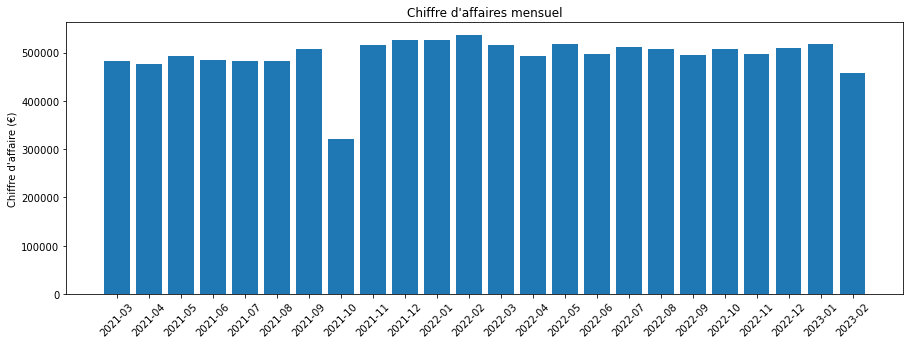

In [57]:
# calcul du chiffre d'affaires réalisé par mois
plt.figure(figsize=(15,5))
graph = df.groupby('annee_mois').sum()[['price']]
plt.bar(graph.index, graph.price)
plt.title("Chiffre d'affaires mensuel")
plt.ylabel("Chiffre d'affaire (€)")
plt.xticks(rotation=45)
plt.show()

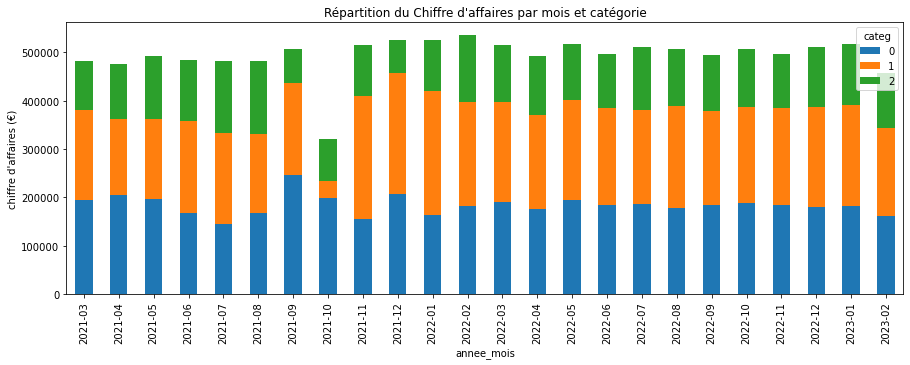

In [58]:
# chiffre d'affaires par mois et par catégorie
pd.crosstab(df['annee_mois'],df['categ'], values=df['price'], aggfunc='sum').plot(kind='bar', ylabel="chiffre d'affaires (€)", title="Répartition du Chiffre d'affaires par mois et catégorie", figsize=(15,5), stacked=True);


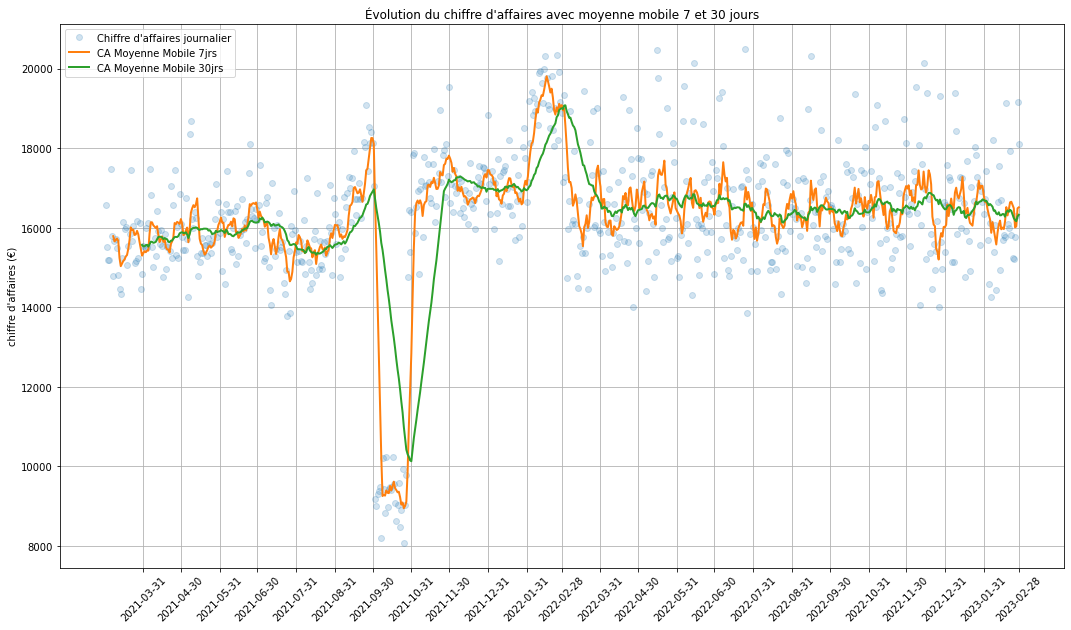

In [59]:
# calcul de la Moyenne mobile 7 et 30 jours pour le chiffre d'affaires
d = df.groupby(['date'])[['price']].sum().copy()
d = d.rename({'price':'revenue'}, axis=1)
d['SMA7'] = d['revenue'].rolling(7).mean()
d['SMA30'] = d['revenue'].rolling(30).mean()

plt.figure(figsize=(18,10))
plt.plot(d['revenue'], 'o', alpha=0.2, label="Chiffre d'affaires journalier")
plt.plot(d['SMA7'], linewidth=2, label='CA Moyenne Mobile 7jrs')
plt.plot(d['SMA30'],linewidth=2, label='CA Moyenne Mobile 30jrs')
plt.title("Évolution du chiffre d'affaires avec moyenne mobile 7 et 30 jours")
plt.ylabel("chiffre d'affaires (€)")
plt.xticks(pd.date_range(start=min(d.index), end=max(d.index), freq='M'), rotation=45)
plt.legend()
plt.grid()
plt.show()

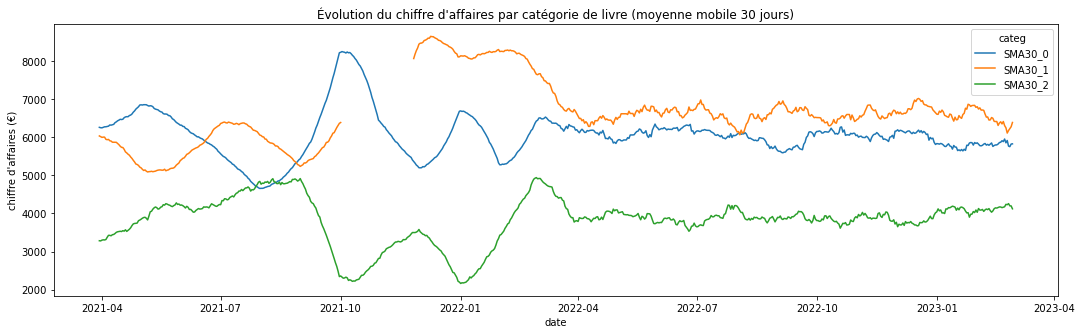

In [60]:
# calcul de la Moyenne mobiledf par catégorie de produit
c = pd.crosstab(df['date'],df['categ'], values=df['price'], aggfunc='sum').copy()
c['SMA30_0'] = c[0].rolling(30).mean()
c['SMA30_1'] = c[1].rolling(30).mean()
c['SMA30_2'] = c[2].rolling(30).mean()

c[['SMA30_0','SMA30_1','SMA30_2']].plot(figsize=(18,5), ylabel="chiffre d'affaires (€)")
plt.title("Évolution du chiffre d'affaires par catégorie de livre (moyenne mobile 30 jours)")
plt.show()

In [61]:
# comptabilisation du nombre de jours manquants pour la catégorie 1
pd.crosstab(df['date'],df['categ'], values=df['price'], aggfunc='sum').isnull().sum()

categ
0     0
1    21
2     0
dtype: int64

In [62]:
# Recherche des dates qui renvoient des valeurs nulles pour la catégorie 1
null = pd.crosstab(df['date'],df['categ'], values=df['price'], aggfunc='sum')
null[null[1].isnull()]

categ,0,1,2
date,,,
2021-10-02,7141.01,NaN,2041.12
2021-10-03,6786.57,NaN,2206.48
2021-10-05,6357.91,NaN,3032.55
2021-10-06,7546.58,NaN,1944.11
2021-10-07,6404.01,NaN,1787.07
2021-10-08,7069.53,NaN,3137.82
2021-10-09,6808.69,NaN,2616.67
2021-10-10,6490.98,NaN,2334.67
2021-10-11,7005.40,NaN,3225.16


 Le chiffre d'affaires qui s'effondre pendant 26 jours en octobre 2021 est dû à l'absence de vente de livres de catégorie 1, entre le 2 et le 27 octobre.

### 5.Analyse des références et catégories de livres

In [63]:
# création d'un dataframe avec le nombre de ventes et chiffre d'affaires pour toutes les références
ref = df.groupby(['id_prod']).agg({'id_prod':'count', 'price':'sum'}).sort_values(by=['price'], ascending=False).copy()
ref = ref.rename({'id_prod':'ventes', 'price':'revenues'}, axis=1)
ref = ref.reset_index().copy()
#ajout de catégorie pour chaque 'prod_id'
refcateg = pd.merge(ref, df[['id_prod', 'categ']], how='inner')
refcateg = refcateg.drop_duplicates()
refcateg.head()

,id_prod,ventes,revenues,categ
0,2_159,650,94893.50,2
650,2_135,1005,69334.95,2
1655,2_112,968,65407.76,2
2623,2_102,1027,60736.78,2
3650,2_209,814,56971.86,2


#### Livres les plus performants :
#### Représentation des 20 références avec le plus gros chiffre d'affaires

In [64]:
# représentation des TOP : les 20 références avec les meilleures ventes et le meilleur chiffre d'affaires
top_ca = refcateg.sort_values(by=['revenues'], ascending=False).head(20).copy()
top_ve = refcateg.sort_values(by=['ventes'], ascending=False).head(20).copy()


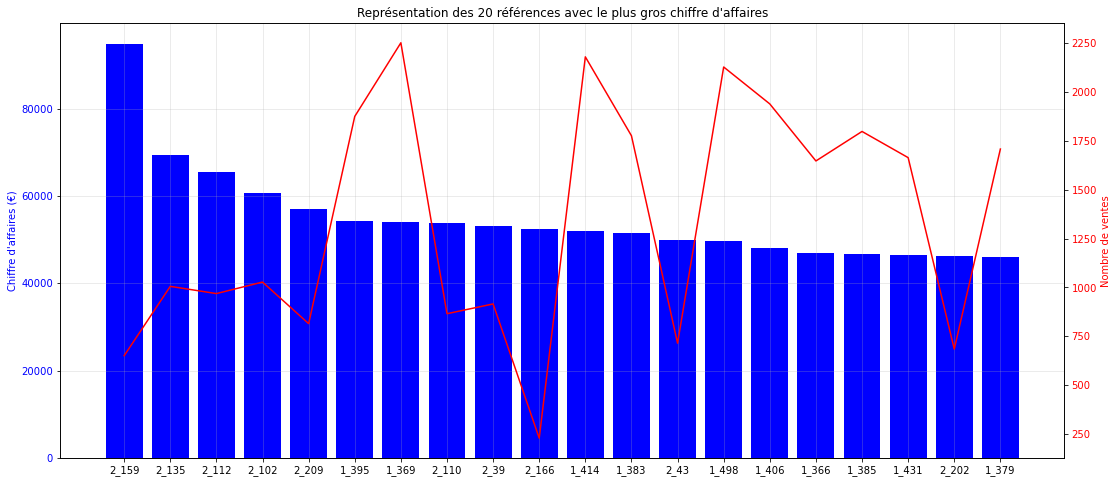

In [65]:
fig, ax1 = plt.subplots(figsize=(18,8))

# Représentation des Chiffres d'affaires les meilleurs (bar) comparés au nombre de vente pour la référence
ax1.set_title("Représentation des 20 références avec le plus gros chiffre d'affaires")
ax1.bar(top_ca.id_prod, top_ca.revenues, color = 'b')
ax1.set_ylabel("Chiffre d'affaires (€)", color = 'b')
ax1.tick_params(axis ='y', labelcolor = 'b')
ax1.grid(alpha=0.3)
# ajout de la 2nde mesure sur le même graphique avec un axe Y différent
ax2 = ax1.twinx() 
ax2.plot(top_ca.id_prod, top_ca.ventes, color = 'red') 
ax2.set_ylabel('Nombre de ventes', color = 'red') 
ax2.tick_params(axis ='y', labelcolor = 'red')

plt.show()

#### Représentation des 20 références ayant réalisé les meilleures ventes

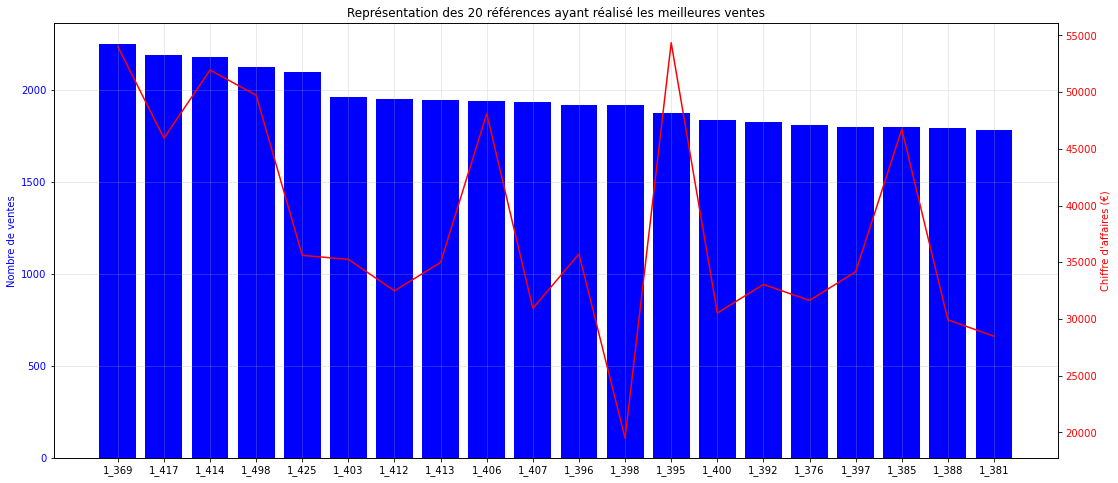

In [66]:
fig, ax1 = plt.subplots(figsize=(18,8))

# Représentation des meilleures ventes (bar) comparées au chiffre d'affaires réalisé pour la référence 
ax1.set_title("Représentation des 20 références ayant réalisé les meilleures ventes")
ax1.bar(top_ve.id_prod, top_ve.ventes, color = 'b') 
ax1.set_ylabel('Nombre de ventes', color = 'b')
ax1.tick_params(axis ='y', labelcolor = 'b')
ax1.grid(alpha=0.3)
# ajout de la 2nde mesure sur le même graphique avec un axe Y différent
ax2 = ax1.twinx()
ax2.plot(top_ve.id_prod, top_ve.revenues, color = 'red')
ax2.set_ylabel("Chiffre d'affaires (€)", color = 'red')
ax2.tick_params(axis ='y', labelcolor = 'red')

plt.show()

#### Livres les moins performants
#### Représentation des 20 références avec le plus faible chiffre d'affaires

In [67]:
# représentation des FLOP : les 20 références avec les plus faibles ventes et le moins bon chiffre d'affaires
flop_ca = refcateg.sort_values(by=['revenues'], ascending=True).head(20).copy()
flop_ve = refcateg.sort_values(by=['ventes'], ascending=True).head(20).copy()

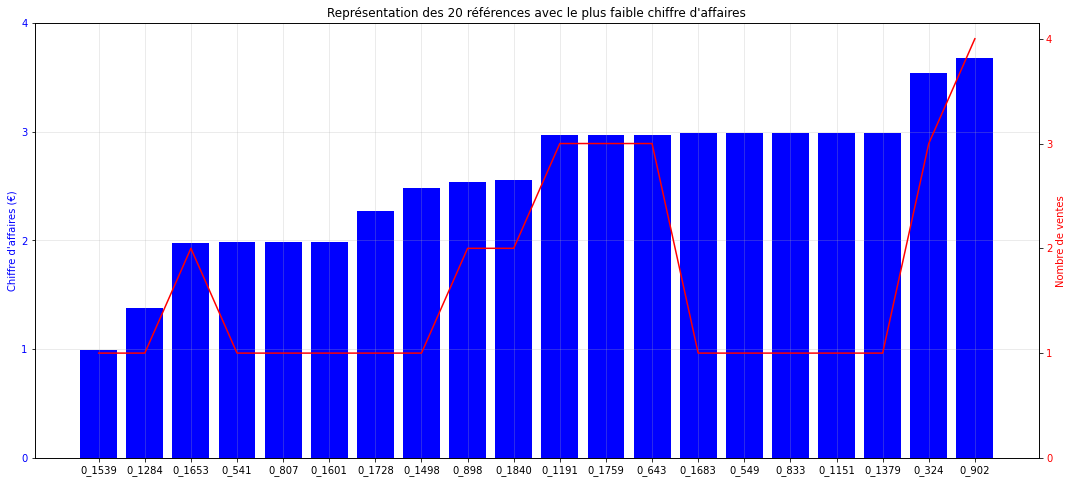

In [68]:
fig, ax1 = plt.subplots(figsize=(18,8))

# Représentation des chiffres d'affaires les moins forts (bar) comparés au nombre de vente pour la référence
ax1.set_title("Représentation des 20 références avec le plus faible chiffre d'affaires")
ax1.bar(flop_ca.id_prod, flop_ca.revenues, color = 'b')
ax1.set_ylabel("Chiffre d'affaires (€)", color = 'b')
ax1.tick_params(axis ='y', labelcolor = 'b')
ax1.set_yticks(range(0, 5, 1))
ax1.grid(alpha=0.3)
# ajout de la 2nde mesure sur le même graphique avec un axe Y différent
ax2 = ax1.twinx() 
ax2.plot(flop_ca.id_prod, flop_ca.ventes, color = 'red') 
ax2.set_ylabel('Nombre de ventes', color = 'red') 
ax2.tick_params(axis ='y', labelcolor = 'red')
ax2.set_yticks(range(0, 5, 1))

plt.show()

#### Représentation des 20 références ayant réalisé le moins de ventes

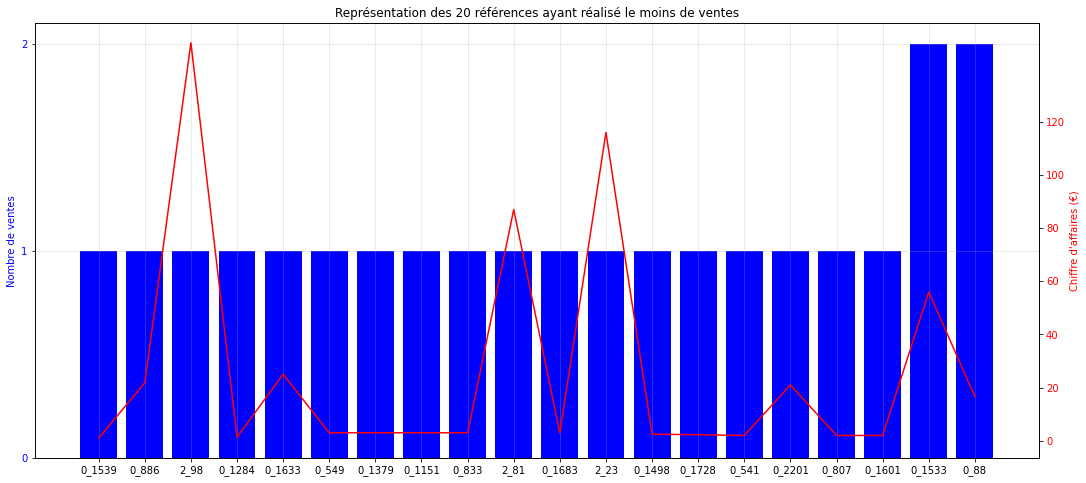

In [69]:
fig, ax1 = plt.subplots(figsize=(18,8))

# Représentation des meilleures ventes (bar) comparées au chiffre d'affaires réalisé pour la référence 
ax1.set_title("Représentation des 20 références ayant réalisé le moins de ventes")
ax1.bar(flop_ve.id_prod, flop_ve.ventes, color = 'b') 
ax1.set_ylabel('Nombre de ventes', color = 'b')
ax1.set_yticks(range(0, 3, 1))
ax1.tick_params(axis ='y', labelcolor = 'b')
ax1.grid(alpha=0.3)
# ajout de la 2nde mesure sur le même graphique avec un axe Y différent
ax2 = ax1.twinx()
ax2.plot(flop_ve.id_prod, flop_ve.revenues, color = 'red')
ax2.set_ylabel("Chiffre d'affaires (€)", color = 'red')
ax2.tick_params(axis ='y', labelcolor = 'red')
ax2.set_yticks(range(0, 130, 20))

plt.show()

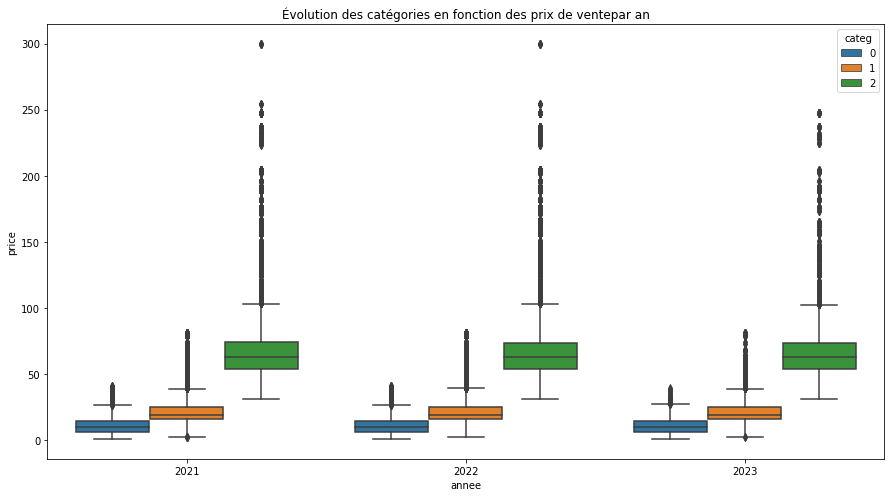

In [70]:
# représentation des catégories par an en fonction des prix de vente
plt.figure(figsize=(15,8))
sns.boxplot(y=df.price, x=df.annee, hue=df.categ)
plt.title("Évolution des catégories en fonction des prix de ventepar an")

plt.show()

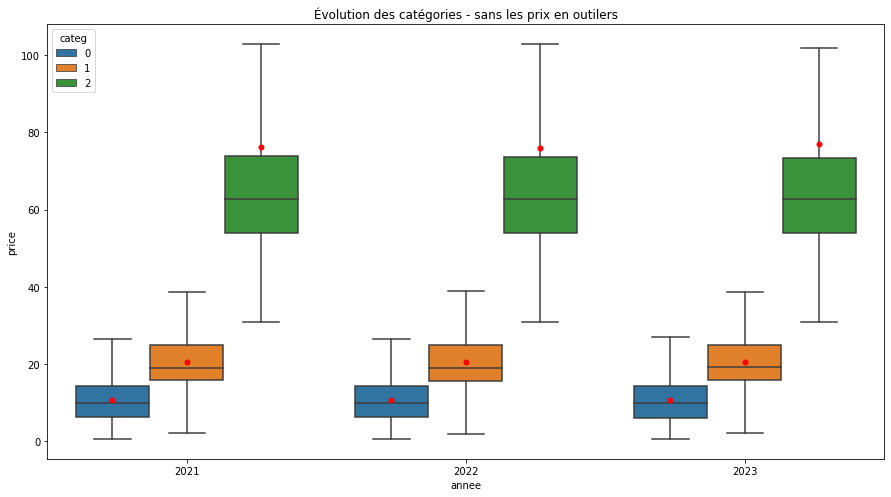

In [71]:
# représentation des catégories par an en fonction des prix de vente
plt.figure(figsize=(15,8))
sns.boxplot(y=df.price, x=df.annee, hue=df.categ, showfliers = False, showmeans=True, 
                 meanprops={"marker":"o", "markerfacecolor":'r',"markeredgecolor":'r',"markersize":'5'})
plt.title("Évolution des catégories - sans les prix en outilers")

plt.show()

### 6.Analyse des profils des clients et leurs achats

In [72]:
# création d'un DataFrame avec le nombre de ventes et chiffre d'affaires pour toutes les références
clt = df.groupby('client_id').agg({'id_prod':'count', 'price':'sum'}).reset_index().copy()
clt = clt.rename({'id_prod':'ventes', 'price':'revenues'}, axis=1)
clts = pd.merge(clt, df[['client_id', 'birth','age', 'sex']], on='client_id', how='inner')
clts = clts.drop_duplicates().reset_index(drop=True)
clts.shape

(8600, 6)

Il y a 8600 clients dans notre base.

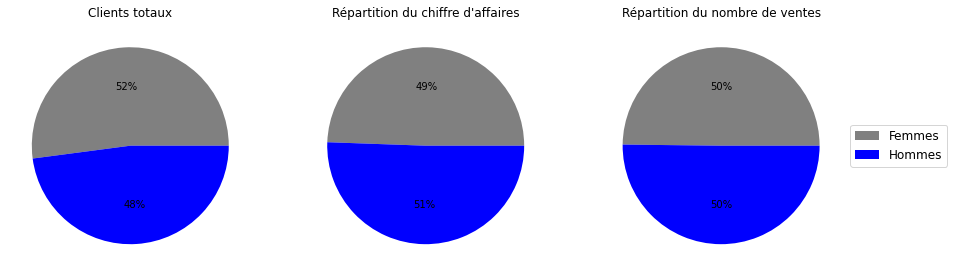

In [73]:
#Répartition des clients selon leur genre et leur profil d'achat
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

clts.groupby('sex')['client_id'].count().plot(kind='pie', ax=ax1, autopct='%1.0f%%', colors = ['grey', 'b'], labels=None)
ax1.set_title("Clients totaux")
ax1.set_ylabel(None)

clts.groupby('sex')['revenues'].sum().plot(kind='pie', ax=ax2, autopct='%1.0f%%', colors = ['grey', 'b'], labels=None)
ax2.set_title("Répartition du chiffre d'affaires")
ax2.set_ylabel(None)

clts.groupby('sex')['ventes'].sum().plot(kind='pie', ax=ax3, autopct='%1.0f%%', colors = ['grey', 'b'], labels=None)
ax3.set_title("Répartition du nombre de ventes")
ax3.legend(labels=['Femmes', 'Hommes'], fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
ax3.set_ylabel(None)

plt.show()

In [74]:
#10 meilleurs clients selon le montant des achats.
clts.sort_values('revenues', ascending=False).head(10)

,client_id,ventes,revenues,birth,age,sex
677,c_1609,25488,324033.350000,1980,42,m
4388,c_4958,5195,289760.340000,1999,23,m
6337,c_6714,9187,153703.648641,1968,54,f
2724,c_3454,6773,113690.294320,1969,53,m
2513,c_3263,403,5276.870000,1985,37,f
634,c_1570,369,5271.620000,1979,43,f
2108,c_2899,105,5214.050000,1994,28,f
1268,c_2140,402,5208.820000,1977,45,f
7006,c_7319,371,5155.770000,1974,48,f
7791,c_8026,377,5100.034773,1978,44,m


In [75]:
#10 meilleurs clients selon le nombre de livres achetés.
clts.sort_values('ventes', ascending=False).head(10)

,client_id,ventes,revenues,birth,age,sex
677,c_1609,25488,324033.350000,1980,42,m
6337,c_6714,9187,153703.648641,1968,54,f
2724,c_3454,6773,113690.294320,1969,53,m
4388,c_4958,5195,289760.340000,1999,23,m
2513,c_3263,403,5276.870000,1985,37,f
1268,c_2140,402,5208.820000,1977,45,f
1772,c_2595,398,4959.660000,1974,48,m
1197,c_2077,384,4816.780000,1984,38,f
708,c_1637,380,4698.870000,1988,34,f
7120,c_7421,379,5050.200000,1978,44,m


In [76]:
# définition des valeurs à prendre en compte et classé par ordre alphabétique
X = clts[['revenues']].sort_values('revenues').values

In [77]:
#calcul de l'indice de Gini
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [78]:
print('L\'indice de GINI est: %.4f' %gini(X))

L'indice de GINI est: 0.4464


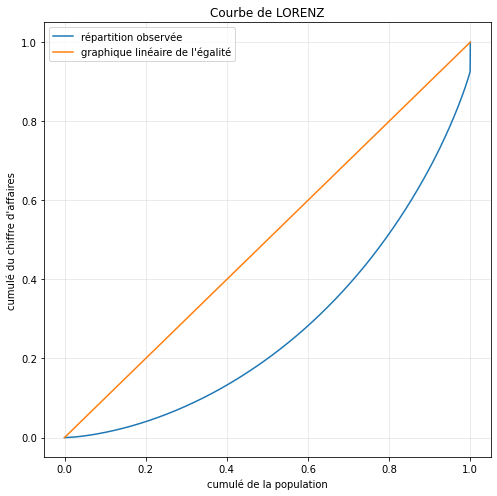

In [79]:
def lorenz(arr):
    n = len(X)
    lorenz = np.cumsum(X) / X.sum()
    lorenz = np.append([0],lorenz)
    xaxis = np.linspace(0-1/n,1+1/n,len(lorenz))
    
# représentation graphique de la courbe de Lorenz
    plt.figure(figsize=(8,8))
    plt.plot(xaxis,lorenz, label="répartition observée")
    plt.plot([0,1], [0,1], label="graphique linéaire de l'égalité")
    plt.title("Courbe de LORENZ")
    plt.xlabel("cumulé de la population")
    plt.ylabel("cumulé du chiffre d'affaires")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

lorenz(X)

Les 50% des clients avec une consommation la plus faible ont réalisé 20% de chiffre d'affaires,  et donc 80% du chiffre d'affaires restant a été complété par les 50% des plus gros clients.

-plus l'indice de GINI est proche de 0, plus la répartition de consommation des clients est égalitaire.

-plus l'indice est proche de 1, plus lala répartition de consommation des clients est inégalitaire.

Cette interprétation est bien la résultante d'un indice de Gini proche de 50%, dans notre cas de 45%. (la courbe de Lorenze ou répartition obsérvée est assez proche de la diagonale, donc la la répartition de consommation des clients est assez  égalitaire

##### Analyse de la répartition du montant des achats des clients

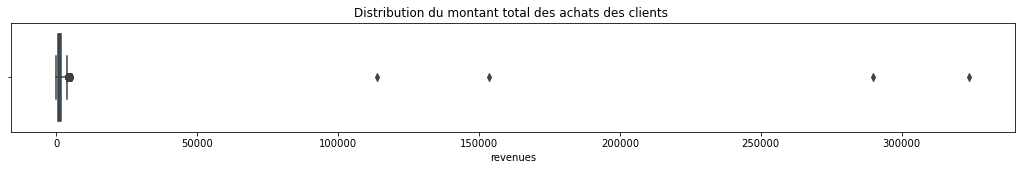

In [80]:
plt.subplots(figsize=(18,2))
ax = sns.boxplot(x="revenues", data=clts)
plt.title('Distribution du montant total des achats des clients ')
plt.show()

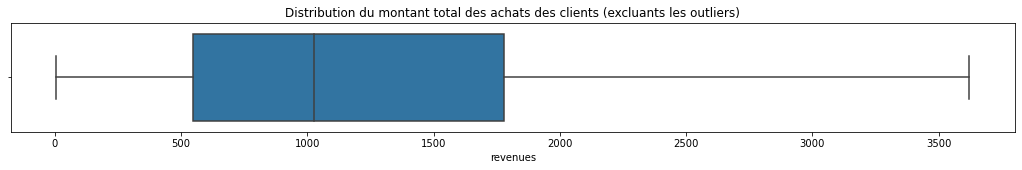

In [81]:
plt.subplots(figsize=(18,2))
ax = sns.boxplot(x='revenues', showfliers=False, data = clts)
plt.title('Distribution du montant total des achats des clients (excluants les outliers)')
plt.show()

Il y a 4 clients qui sortent fortement de la masse avec des achats cumulés supérieurs à 100k€.

In [82]:
#création d'une liste pour recenser les 4 clients dont les achats dépassent 100k€ ('c_1609', 'c_3454', 'c_4958', 'c_6714')
clt_sup = clts[clts.revenues > 100000]['client_id'].values
clients = clts[~clts['client_id'].isin(clt_sup)].copy()

In [83]:
print(clts[clts['client_id'].isin(clt_sup)])

print("Les 4 clients", clt_sup,"dont le montant des achats cumulé représente",
      round(clts[clts['client_id'].isin(clt_sup)]['revenues'].sum(), 2),"€, c'est à dire",
      round(clts[clts['client_id'].isin(clt_sup)]['revenues'].sum() / clt.revenues.sum() * 100,2),"% du chiffre d'affaires total de la librairie.")
print("Ces 4 clients ne représentent que",
     round((clts[clts['client_id'].isin(clt_sup)]['client_id'].count()/clts['client_id'].count())*100,2),
     "% des",
      clts['client_id'].count()
      ,"clients de l'ensemble de la librairie")

     client_id  ventes       revenues  birth  age sex
677     c_1609   25488  324033.350000   1980   42   m
2724    c_3454    6773  113690.294320   1969   53   m
4388    c_4958    5195  289760.340000   1999   23   m
6337    c_6714    9187  153703.648641   1968   54   f
Les 4 clients ['c_1609' 'c_3454' 'c_4958' 'c_6714'] dont le montant des achats cumulé représente 881187.63 €, c'est à dire 7.43 % du chiffre d'affaires total de la librairie.
Ces 4 clients ne représentent que 0.05 % des 8600 clients de l'ensemble de la librairie


# la partie statistique :
## le test Khi2 d'indépendance : deux variables qualitatives
##### le lien entre le genre d'un client et les catégorie des livres achetés :
Les Variables categ et sex sont deux variables qualitatives nominales, catégorielles.
Réalisation du test de Khi-2 pour analyser la dépendance entre ces deux variables et donc comparer notre tableau de contingence des observations à une estimation théorique.

In [84]:
df_genre=pd.crosstab(df['sex'],df['categ'], margins = True)

In [85]:
df_genre

categ,0,1,2,All
sex,,,,
f,206103,115016,17283,338402
m,209356,112374,19200,340930
All,415459,227390,36483,679332


In [86]:
df_genre.columns = ["0","1","2","row_totals"]

df_genre.index = ["f","m","col_totals"]

observed = df_genre.iloc[0:2,0:3]   # la même table mais sans les totaux pour plus tard
df_genre

,0,1,2,row_totals
f,206103,115016,17283,338402
m,209356,112374,19200,340930
col_totals,415459,227390,36483,679332


In [87]:
expected =  np.outer(df_genre["row_totals"][0:2],
                     df_genre.loc["col_totals"][0:3]) / 679332

expected = pd.DataFrame(expected)

expected.columns = ["0","1","2"]
expected.index = ["f","m"]

expected

,0,1,2
f,206956.475653,113271.90649,18173.617857
m,208502.524347,114118.09351,18309.382143


In [88]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

147.49092218946103


Nous appelons .sum() deux fois : une fois pour obtenir les sommes des colonnes et une seconde fois pour additionner les sommes des colonnes, renvoyant la somme de l'ensemble du tableau 2D.

In [89]:
crit = stats.chi2.ppf(q = 0.05, # Trouver la valeur critique pour 5 % de confiance, ppf :fonction de point de pourcentage l'inverse du cdf
                      df = 2)   # nombre de degrés de liberté = (2-1)*(3-1)=2

print("Valeur critique", crit)


Valeur critique 0.10258658877510106


In [90]:
stats.chi2_contingency(observed)

(147.49092218946103,
 9.39189397419068e-33,
 2,
 array([[206956.47565255, 113271.90649049,  18173.61785695],
        [208502.52434745, 114118.09350951,  18309.38214305]]))

Le résultat du test du khi-2 permet de déterminer que ces deux variables catégorielles sex et categ ne sont pas indépendantes. Il semble donc que le sexe a une influence sur le type de catégorie de livre acheté.

Le khi-2 calculé de 147,49 sort de la table des valeurs du khi-2 critique. Cela signifie que notre khi-2 calculé sort de la table par la droite, et a donc une probabilité d’erreur qui est située sous le seuil de 0,01 (soit 1%).
Autrement dit, on peut être certain à plus de 99% que nos deux variables sont liées.
Nous rejetons H0 et nous acceptons H1 avec un risque proportionnel à p-value d’avoir tort, soit très faible.

#### Test de Cramer

In [91]:
n = observed.sum().sum()
minDim = min(observed.shape)-1

V = np.sqrt((chi_squared_stat/n) / minDim)
print('Statistique de test V de Cramér :', '{:.2f}'.format(V))

Statistique de test V de Cramér : 0.01


## le Test de Pearson: deux variables quantitatives
##### le lien entre l’âge des clients et le montant total des achats

In [92]:
pd.DataFrame(pearsonr(clts['revenues'],clts['age']),
              index = ['pearson_coef', 'p_value'],
              columns = ['resultat_test'])

,resultat_test
pearson_coef,-0.039893
p_value,0.000215


In [93]:
clts.head()

,client_id,ventes,revenues,birth,age,sex
0,c_1,39,558.18,1955,67,m
1,c_10,58,1353.60,1956,66,m
2,c_100,8,254.85,1992,30,m
3,c_1000,125,2261.89,1966,56,f
4,c_1001,102,1812.86,1982,40,m


In [94]:
def pearsmon(x,y):
    print("""
        H0 : Il n’y a pas de corrélation, les variables sont indépendantes
        H1 : Il y a une corrélation, les variables sont dépendantes.
""")
# test de Spearman
r, p = pearsonr(clts.revenues,clts.age)
print("Statistique de test r de Pearson :", "{:.2f}".format(r))
print("p_valeur :", "{:.2f}".format(p))


Statistique de test r de Pearson : -0.04
p_valeur : 0.00


Le résultat du test de corrélation de Pearson permet de déterminer que ces deux variables quantitatives age et montant des achats sont corrélées. Il semble donc que le montant des achats des clients soit corrélé à leur âge.

Le coefficient de corrélation calculé de -0,04 nous indique une corrélation modérée entre les variables avec une indication sur un corrélation négative.

Nous rejetons H0 et nous acceptons H1 avec un risque proportionnel à p-value d’avoir tort très faible. Notre niveau de risque de 5% étant très en deçà de la p-value (qui est de 0), nous pouvons avancer que la probabilité d'erreur est sous le seuil de 1%.

In [95]:
def test_Spearman(x,y):
    print("""
        H0 : Il n’y a pas de corrélation, les variables sont indépendantes
        H1 : Il y a une corrélation, les variables sont dépendantes.
""")
# test de Spearman
r, p = stats.spearmanr(clts.revenues,clts.age)
print("Statistique de test r de Spearman :", "{:.2f}".format(r))
print("p_valeur :", p)

Statistique de test r de Spearman : -0.18
p_valeur : 5.130908527718847e-67


Le résultat du test corrélation de Spearman de -0,18 indique une faible relation descendante entre les variables quantitatives age et montant des achats. Nous avons la confirmation en supplément du test de Pearson qu'il semble donc que le montant des achats des clients soit corrélé à leur âge.

Nous rejetons H0 et nous acceptons H1 avec un risque proportionnel à p-value d’avoir tort très faible. Notre niveau de risque de 5% étant très en deçà de la p-value, nous pouvons avancer que la probabilité d'erreur est sous le seuil de 1%.

## le Test de l'anova : Anova à 1 facteur :
##### le lien entre l’âge des clients et le montant total des achats
On effectue une analyse de variance pour mesurer l’indépendance entre une variable qualitative (le montant totaldes achats) et une quantitative (tranche d'âge).

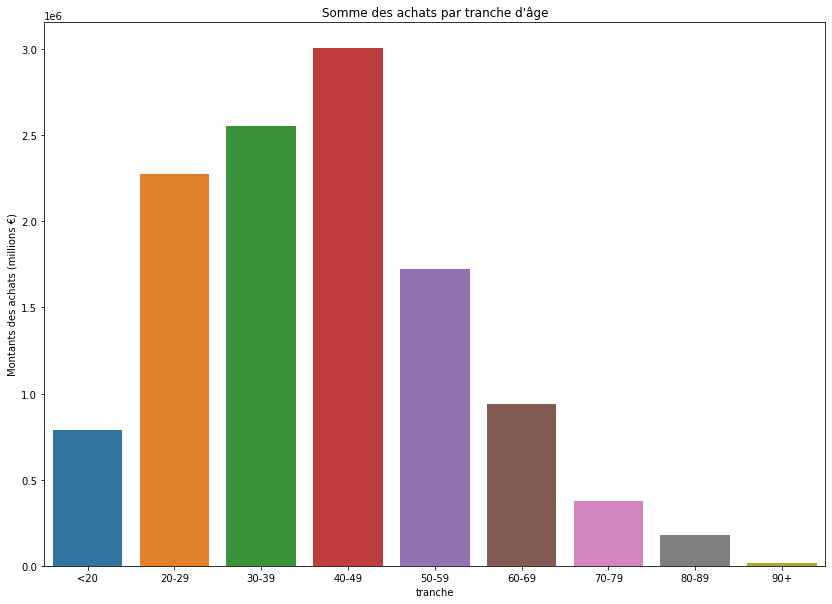

In [96]:
# Discrétisation de la variable âge
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, np.inf]
ages = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
clts['tranche'] = pd.cut(clts.age, bins, labels=ages)
clts['tranche'] = clts['tranche'].astype(str)

# Représentation graphique des classes d'âge en fonction du montant des achats
fig, (ax1) = plt.subplots(1,1, figsize=(14,10))

sns.barplot(x='tranche', y='revenues', data=clts, ax=ax1, ci=None, estimator=sum, order=ages)
ax1.set_ylabel('Montants des achats (millions €)')
ax1.set_title("Somme des achats par tranche d'âge")



plt.show()

In [97]:
# taille de chaque classe d'âge
clts.groupby(['tranche']).count()['client_id']

tranche
20-29    1499
30-39    1645
40-49    1766
50-59    1450
60-69    1009
70-79     436
80-89     196
90+        17
<20       582
Name: client_id, dtype: int64

Dans une ANOVA, on cherche à déterminer si les moyennes des groupes sont significativement différentes. On pose donc :

H0 : Les moyennes de chaque groupe sont égales si p-value > 5%

H1 : Les moyennes de chaque groupe ne sont pas toutes égales si p-value < 5%

In [98]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('revenues ~ tranche', data=clts).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
tranche,6.812153e+08,8.0,3.176097,0.00134
Residual,2.303267e+11,8591.0,NaN,NaN


-H0 : Les moyennes de chaque groupe sont égales si p-value > 5%~

-H1 : Les moyennes de chaque groupe ne sont pas toutes égales < 5%

La pertinence de ce test repose sur la validation de plusieurs hypothèses :

~l’indépendance entre les échantillons de chaque groupe
~l’égalité des variances que l’on peut verifier avec un test de Bartlett.
~la normalité des résidus avec un test de Shapiro.


##### L'indépendance :
L’indépendance est une des 3 conditions de validité d’une ANOVA. Seul le contexte de l’étude permet de s’assurer de l’indépendance entre les échantillons de chaque groupe (ici es tranches d'âges des clients formé.)

#### L’égalité des variances :
On parle aussi d’homoscédasticité. C’est une des 3 conditions de validité d’une ANOVA. On cherche à démontrer que les variances de chaque groupe sont égales. Dans un boxplot, l’amplitude des boîtes traduit graphiquement l’égalité des variances.



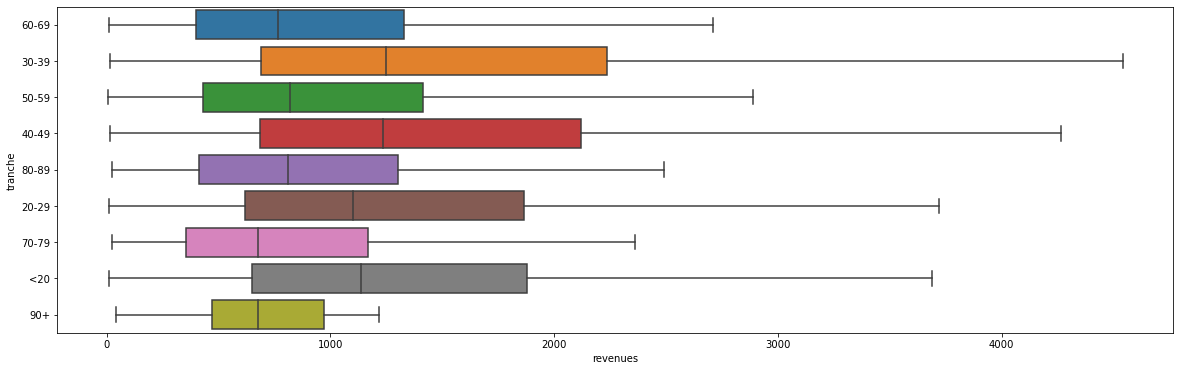

In [99]:
plt.subplots(figsize=(20,6))
ax = sns.boxplot(x="revenues", y="tranche", showfliers=False, data=clts)

Mais c’est le test de levene qui permet de tester si les variances sont significativement différentes ou non avec :

-H0 : Les variances de chaque groupe sont égales si p-value > 5%

-H1 : Au moins l'une des variances est différente d'une autre si p-value < 5%

In [100]:
levene(clts.revenues[clts.tranche == '<20'],
        clts.revenues[clts.tranche == '20-29'],
        clts.revenues[clts.tranche == '30-39'],
        clts.revenues[clts.tranche == '40-49'],
        clts.revenues[clts.tranche == '50-59'],
        clts.revenues[clts.tranche == '60-69'],
        clts.revenues[clts.tranche == '70-79'],
        clts.revenues[clts.tranche == '80-89'],
        clts.revenues[clts.tranche == '90+'],)

LeveneResult(statistic=1.1714805018591419, pvalue=0.31205023670131904)

Etant donné que la p-value calculée est supérieure au niveau de signification seuil alpha=0.05, on ne peut pas rejeter l'hypothèse nulle H0.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vrai est de 31.20%


#### Normalité des résidus :
C’est une des 3 conditions de validité d’une ANOVA. L’objectif est de s’assurer que les résidus suivent une loi normale afin de ne pas affirmer qu’il existe une différence de moyenne entre les groupes qui serait causée par le hasard.

On utilise le test de Shapiro-Wilk pour tester la normalité des résidus où :

H0 : Les résidus suivent une loi normale si p-value > 5%

H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

In [101]:
model = ols('revenues ~ tranche', data=clts).fit()
shapiro(model.resid)

/Users/fabienmirosa/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.0597689151763916, pvalue=0.0)

La distribution ne suit pas une loi normale puisque p-value est inférieur à alpha=0.05. mais avec un très grand nombre dans l'échantillon, on peut considérer que la variable revenue correspondant au montant total des achats converge en loi vers une loi Normale.
ANOVA est considérée comme assez robuste contre les violations de l'hypothèse de normalité tant que les tailles d'échantillon sont suffisamment grandes.

Avec des échantillons extrêmement grands, le test de Shapiro-Wilk résultera presque toujours que les données ne sont pas normales. Pour cette raison, il est préférable d'inspecter visuellement les données à l'aide de graphiques et en excluant les 4 plus grands clients de la bibliothéque (sur 8600 clients de l'ensemble de la librairie) 

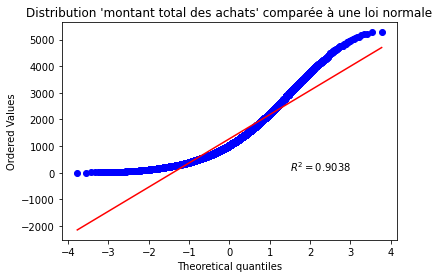

In [102]:
# Représentation graphique de la distribution `montant total des achats` comparée à une loi normale
plt.figure()
stats.probplot(clients.revenues, dist="norm", plot=plt, rvalue=True)
plt.title("Distribution 'montant total des achats' comparée à une loi normale")
plt.show()

La vérification visuelle de la distribution sur un échantillon volumineux consiste à utiliser un graphique de probabilité pour évaluer la corrélation des valeurs observées avec la distribution normale.
Le graphique génère un tracé de probabilité des données par rapport à l'échelle des quantiles théoriques d'une distribution normale.
La line indique le meilleur ajustement pour les données par rapport à la loi normale et le coefficient de détermination linéaire mesure l'adéquation de notre variable à la loi normale, soit 90% des points sont déterminés par la droite de régression

#### Conclusion du test de l'ANOVA (ANalyse de VAriance)
H0 : Tous montants des achats moyens sont égaux pour toutes les classes d'âge (si p-value>alpha=5%).

H1 : Au moins une classe d'âge obtient des montants d'achat moyens différents des autres classes (si p-value<alpha).

In [103]:
model = ols('revenues ~ tranche', data=clts).fit() # Ordinary Least Squares (OLS) model
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
tranche,6.812153e+08,8.0,3.176097,0.00134
Residual,2.303267e+11,8591.0,NaN,NaN


### p-value < alpha(0.05), donc on rejette H0 et on accepte H1 avec un risque inférieure a 1%.
Les deux variables 'age' et 'montant' des achats n'ont pas des moyennes égales pour chaque classe d'âge. Il semble donc que le montant des achats des clients soit dépendant de l'âge.

#### TEST NON-PARAMÉTRIQUE SUR K ÉCHANTILLONS INDÉPENDANTS: TEST DE KRUSKAL-WALLIS
Le test de Kruskal-Wallis est souvent utilisé comme une alternative à l'ANOVA dans le cas où l'hypothèse de normalité n'est pas acceptable. Il permet de tester si k échantillons (k>2) proviennent de la même population, ou de populations ayant des caractéristiques identiques, au sens d'un paramètre de position (le paramètre de position est conceptuellement proche de la médiane, mais le test de Kruskal-Wallis prend en compte plus d'information que la position au seul sens de la médiane).

Principe du test de Kruskal-Wallis

Si on désigne par Mi le paramètre de position l'échantillon i, les hypothèses nulle H0 et alternative Ha du test de Kruskal-Wallis sont les suivantes :

H0 : M1 = M2 = … = Mk

Ha : il existe au moins un couple (i, j) tel que Mi ≠ Mj

In [104]:
stats.kruskal(clts.revenues[clts.tranche == '<20'],
        clts.revenues[clts.tranche == '20-29'],
        clts.revenues[clts.tranche == '30-39'],
        clts.revenues[clts.tranche == '40-49'],
        clts.revenues[clts.tranche == '50-59'],
        clts.revenues[clts.tranche == '60-69'],
        clts.revenues[clts.tranche == '70-79'],
        clts.revenues[clts.tranche == '80-89'],
        clts.revenues[clts.tranche == '90+'],)

KruskalResult(statistic=561.2193014771055, pvalue=5.053414643582407e-116)

Les médianes ne sont pas égales, il y'a au moins une classe d'âge obtient un montant d'achat médiant différent des autres classes.(rejeter H0).
Ce résultat du test de Kruskal-Wallis nous confirme les resultats du test de l'ANOVA qui indique qu'il y a bien un lien entre les variables age et montant total des achats.

## Test de pearson:
#### Lien entre l’âge des clients et la fréquence d’achat

In [105]:
# calcul de la fréquence
freq = df.groupby('client_id')[['session_id']].nunique().reset_index().copy()
freq['frequence'] = freq['session_id'] / 24
freq.head()

,client_id,session_id,frequence
0,c_1,33,1.375000
1,c_10,34,1.416667
2,c_100,5,0.208333
3,c_1000,93,3.875000
4,c_1001,47,1.958333


In [106]:
# création d'un nouveau DataFrame grâce à une fusion pour inclure la fréquence
clts_freq = pd.merge(clts, freq[['client_id', 'frequence']], on='client_id', how='left')
clts_freq.head()

,client_id,ventes,revenues,birth,age,sex,tranche,frequence
0,c_1,39,558.18,1955,67,m,60-69,1.375000
1,c_10,58,1353.60,1956,66,m,60-69,1.416667
2,c_100,8,254.85,1992,30,m,30-39,0.208333
3,c_1000,125,2261.89,1966,56,f,50-59,3.875000
4,c_1001,102,1812.86,1982,40,m,40-49,1.958333


In [107]:
pearsonr(clts_freq.age, clts_freq.frequence)

(0.034150318117134176, 0.0015379077592431927)

H0 : Il n’y a pas de corrélation, les variables sont indépendantes.

H1 : Il y a une corrélation, les variables sont dépendantes.

Etant donné que la p-value calculée est inférieur au niveau de signification seuil alpha=0.05, on ne peut rejeter l'hypothèse nulle H0. Le risque de rejeter l'hypothèse nulle H0 est inférieur au seuil de 1%.
Donc le résultat du test de corrélation de Pearson permet de déterminer que ces deux variables quantitatives 'age' et 'fréquence' d'achat sont corrélées. Il semble donc que le montant la fréquence d'achat des clients soit corrélé à leur âge.

#### Test de l'ANOVA : l'âge en tranche en tant que variable quali.

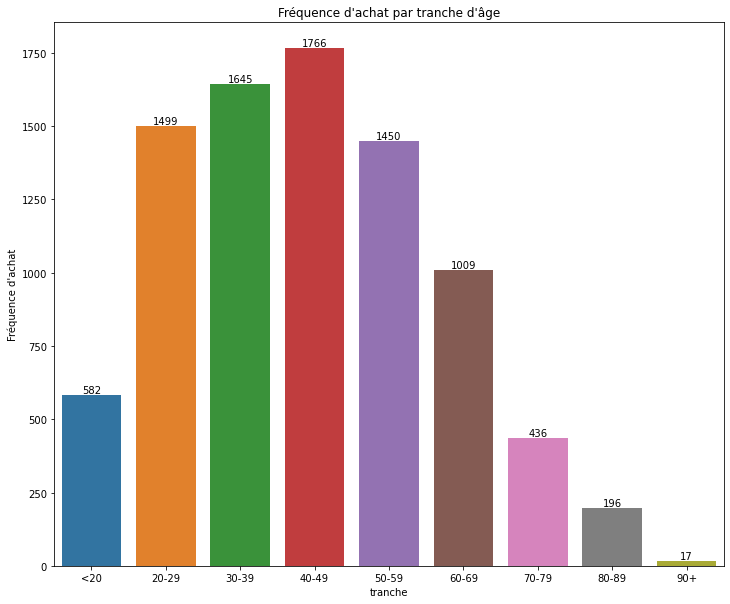

In [108]:
# Représentation graphique des classes d'âge en fonction de la fréquences d'acah
fig, (ax) = plt.subplots(1,1, figsize=(12,10))

sns.barplot(x='tranche', y='frequence', data=clts_freq, ax=ax, ci=None, estimator=len, order=ages)
ax.set_ylabel('Fréquence d\'achat')
ax.set_title('Fréquence d\'achat par tranche d\'âge')
for n in ax.patches:
    ax.annotate("%.0f" % n.get_height(), (n.get_x() + n.get_width() / 2., n.get_height()),
    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


plt.show()

In [109]:
#L’égalité des variances: test Levene
levene(clts_freq.frequence[clts_freq.tranche == '<20'],
        clts_freq.frequence[clts_freq.tranche == '20-29'],
        clts_freq.frequence[clts_freq.tranche == '30-39'],
        clts_freq.frequence[clts_freq.tranche == '40-49'],
        clts_freq.frequence[clts_freq.tranche == '50-59'],
        clts_freq.frequence[clts_freq.tranche == '60-69'],
        clts_freq.frequence[clts_freq.tranche == '70-79'],
        clts_freq.frequence[clts_freq.tranche == '80-89'],
        clts_freq.frequence[clts_freq.tranche == '90+'],)

LeveneResult(statistic=3.453880036194632, pvalue=0.0005574153090645404)

Le test de levene permet de tester si les variances sont significativement différentes ou non avec :

-H0 : Les variances de chaque groupe sont égales si p-value > 5%

-H1 : Au moins l'une des variances est différente d'une autre si p-value < 5%
##### on rejette H0 avec un resque d'avoir tort en dessous de 1%.

In [110]:
model1 = ols('frequence ~ tranche', data=clts_freq).fit()
shapiro(model1.resid)

/Users/fabienmirosa/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.06829988956451416, pvalue=0.0)

##### Il n'est donc pas conseillé de réaliser une ANOVA car les résultats ne seraient pas fiables. inégalité des variance et les résidus ne suivent pas de loi normale

### Test de Kruskal-Wallis : lien entre les tranche d'âge et la fréquence d'achat

In [111]:
stats.kruskal(clts_freq.frequence[clts_freq.tranche == '<20'],
        clts_freq.frequence[clts_freq.tranche == '20-29'],
        clts_freq.frequence[clts_freq.tranche == '30-39'],
        clts_freq.frequence[clts_freq.tranche == '40-49'],
        clts_freq.frequence[clts_freq.tranche == '50-59'],
        clts_freq.frequence[clts_freq.tranche == '60-69'],
        clts_freq.frequence[clts_freq.tranche == '70-79'],
        clts_freq.frequence[clts_freq.tranche == '80-89'],
        clts_freq.frequence[clts_freq.tranche == '90+'],)

KruskalResult(statistic=1225.00350319732, pvalue=3.794624099738242e-259)

Les médianes ne sont pas égales, il y a un lien entre les variables (rejeter H0)
Le résultat du test de Kruskal-Wallis permet de déterminer que les deux variables age et fréquence des achats n'ont pas des médianes égales pour chaque classe d'age. Il semble donc que la fréquence des achats des clients soit dépendant de l'âge.

 ## Test Pearson : (2 variables quantitatives)
Lien entre l’âge des clients et la taille du panier moyen
Calcul pour chaque session le montant par commande et le nombre d'articles achetés
Puis faire la moyenne du panier (montant & taille) par client

In [112]:
# calcul panier moyen et taille du panier pour chaque session_id
panier_moy = df.groupby(['session_id'])[['price']].mean().reset_index().copy()
taille_pa = df.groupby(['session_id'])[['price']].count().reset_index().copy()

In [113]:
# nouveau DataFrame pour joindre les 2 nouvelles colonnes panier_moyen et taille_panier
pan = pd.merge(panier_moy, taille_pa, on='session_id', how='inner')

In [114]:
pan.columns = ['session_id', 'panier_moyen', 'taille_panier']
pan.head()

,session_id,panier_moyen,taille_panier
0,s_1,11.990,1
1,s_10,26.990,1
2,s_100,16.860,2
3,s_1000,9.805,4
4,s_10000,13.830,3


In [115]:
# création d'un nouveau DataFrame pour obtenir les détails des 'client_id'
ses_pa = pd.merge(df, pan, on='session_id', how='inner')
ses_pa.head()

,id_prod,price,categ,client_id,sex,birth,age,session_id,date_time,date,annee,annee_mois,panier_moyen,taille_panier
0,0_1518,4.18,0,c_103,f,1986,36,s_211425,2022-05-20 13:21:29.043970,2022-05-20,2022,2022-05,10.585,2
1,1_271,16.99,1,c_103,f,1986,36,s_211425,2022-05-20 13:21:10.122134,2022-05-20,2022,2022-05,10.585,2
2,1_251,15.99,1,c_8534,m,1988,34,s_158752,2022-02-02 07:55:19.149409,2022-02-02,2022,2022-02,9.920,4
3,0_1356,5.57,0,c_8534,m,1988,34,s_158752,2022-02-02 08:43:30.556475,2022-02-02,2022,2022-02,9.920,4
4,0_2218,3.27,0,c_8534,m,1988,34,s_158752,2022-02-02 07:56:59.745175,2022-02-02,2022,2022-02,9.920,4


In [116]:
#nouveau DataFrame avec 3 variables pour joindre au DataFrame client
sessions = ses_pa[['client_id', 'session_id', 'panier_moyen', 'taille_panier']].drop_duplicates()
sessions.head()

,client_id,session_id,panier_moyen,taille_panier
0,c_103,s_211425,10.585,2
2,c_8534,s_158752,9.920,4
6,c_6714,s_225667,10.722,5
11,c_6941,s_52962,69.990,1
12,c_4232,s_325227,12.540,4


In [117]:
# DataFrame panier moyen par client_id
pan_moy = sessions.groupby('client_id').mean()['panier_moyen'].reset_index().copy()
tail_moy = sessions.groupby('client_id').mean()['taille_panier'].reset_index().copy()

In [118]:
# Jointure DataFrame client et panier moyen et taille panier par personne
paniers = pd.merge(pan_moy, tail_moy, on='client_id', how='inner')
paniers

,client_id,panier_moyen,taille_panier
0,c_1,13.327091,1.181818
1,c_10,23.119382,1.705882
2,c_100,28.403333,1.600000
3,c_1000,17.730466,1.344086
4,c_1001,15.528245,2.170213
...,...,...,...
8595,c_995,14.409444,1.555556
8596,c_996,16.838671,1.202532
8597,c_997,30.849896,2.458333
8598,c_998,65.052754,2.304348


In [119]:
#jointure pour ajouter le taille & panier moyen au df clts_freq
df_panier = pd.merge(clts_freq, paniers, on='client_id', how='inner')
df_panier

,client_id,ventes,revenues,birth,age,sex,tranche,frequence,panier_moyen,taille_panier
0,c_1,39,558.18,1955,67,m,60-69,1.375000,13.327091,1.181818
1,c_10,58,1353.60,1956,66,m,60-69,1.416667,23.119382,1.705882
2,c_100,8,254.85,1992,30,m,30-39,0.208333,28.403333,1.600000
3,c_1000,125,2261.89,1966,56,f,50-59,3.875000,17.730466,1.344086
4,c_1001,102,1812.86,1982,40,m,40-49,1.958333,15.528245,2.170213
...,...,...,...,...,...,...,...,...,...,...
8595,c_995,14,189.41,1955,67,m,60-69,0.375000,14.409444,1.555556
8596,c_996,95,1625.58,1970,52,f,50-59,3.291667,16.838671,1.202532
8597,c_997,59,1490.01,1994,28,f,20-29,1.000000,30.849896,2.458333
8598,c_998,53,2779.88,2001,21,m,20-29,0.958333,65.052754,2.304348


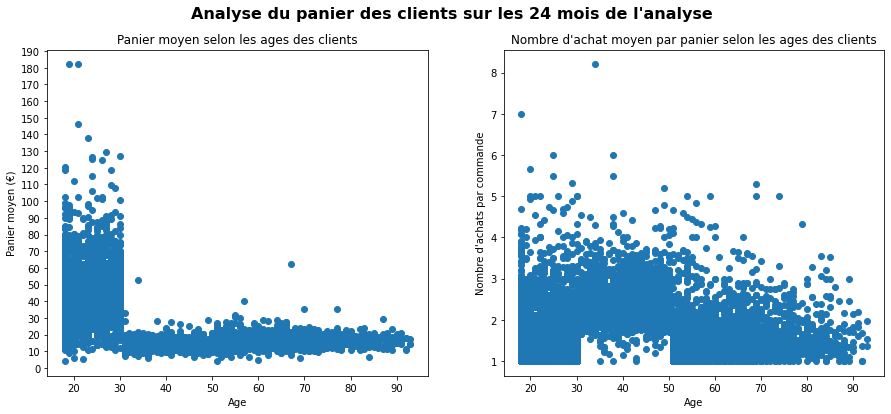

In [120]:

# représentation de l'age en fonction du panier moyen pour chaque client
plt.figure(figsize=(15,6))
plt.suptitle("Analyse du panier des clients sur les 24 mois de l'analyse", fontsize=16, fontweight ="bold")

plt.subplot(1, 2, 1)
plt.scatter(df_panier['age'], df_panier['panier_moyen'])
plt.title("Panier moyen selon les ages des clients")
plt.ylabel('Panier moyen (€)')
plt.xlabel('Age')
plt.yticks(range(0, 200, 10))

plt.subplot(1, 2, 2)
plt.scatter(df_panier['age'], df_panier['taille_panier'])
plt.title("Nombre d'achat moyen par panier selon les ages des clients")
plt.ylabel("Nombre d'achats par commande")
plt.xlabel('Age')

plt.show()

On constate que les clients de moins de 30 ans dépensent beaucoup plus que les clients plus âgés. Les dépenses des jeunes se situent entre 10 et 80€ mais avec des dépenses maximales jusqu'à 180€.
Il y a ensuite une homogénéité du montant du panier pour les clients de plus de 30 ans avec des dépenses entre 5€ et 30€ et une dépense maximale de 60€.

Pour le nombre d'articles achetés par commande on distingue 3 groupes:

-les jeunes de moins de 30 ans qui achètent entre 1 et 3 livres par commande.
-les 30-50 ans qui achètent au moins 2 livres et jusqu'à 4 en moyenne par commande.
-les plus de 50 ans qui achètent entre 1 et 2 livres en moyenne par commande.

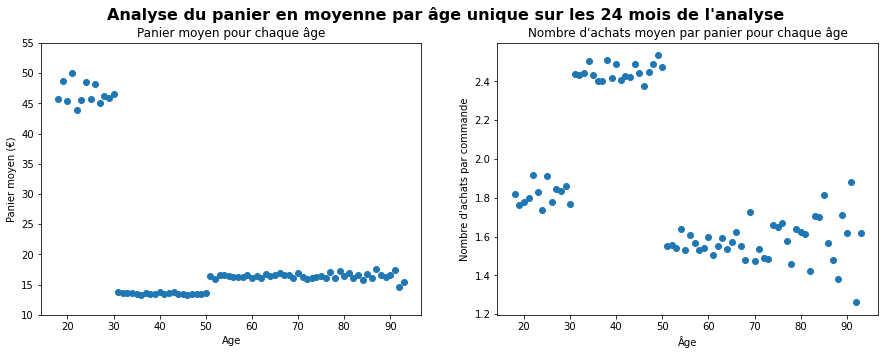

In [121]:
#représentation de la moyenne du panier moyen par âge 
pm = df_panier.groupby(['age'])['panier_moyen'].mean().reset_index()
tp = df_panier.groupby(['age'])['taille_panier'].mean().reset_index()

plt.figure(figsize=(15,5))
plt.suptitle("Analyse du panier en moyenne par âge unique sur les 24 mois de l'analyse", fontsize=16, fontweight ="bold")

plt.subplot(1, 2, 1)
plt.scatter(pm['age'], pm['panier_moyen'])
plt.title("Panier moyen pour chaque âge")
plt.ylabel('Panier moyen (€)')
plt.xlabel('Age')
plt.yticks(range(10, 56, 5))

plt.subplot(1, 2, 2)
plt.scatter(tp['age'], tp['taille_panier'])
plt.title("Nombre d'achats moyen par panier pour chaque âge")
plt.ylabel("Nombre d'achats par commande")
plt.xlabel('Âge')

plt.show()

L'analyse du panier groupée par âge révèle une segmentation nette entre des classes d'âge.

les moins de 30 ans qui dépensent entre 45 et 50€ en moyenne par achat et qui ont tendance à acheter entre 1,8 et 2 livres par commande
les 30 - 50 ans qui dépensent entre 13 et 14€ par commande mais dont le nombre d'article par panier est compris entre 2,4 et 2,6 livres
les plus de 50 ans qui dépensent entre 16 et 18€ par commande et dont le nombre d'article acheté par panier est plus large entre 1,4 et 1,8 livres en moyenne

##### Analyse de la distribution montant du panier moyen

In [122]:
pearsonr(df_panier.panier_moyen, df_panier.age)

(-0.554303724882442, 0.0)

-H0 : Il n’y a pas de corrélation, les variables sont indépendantes (si p-value>5%)
    
-H1 : Il y a une corrélation, les variables sont dépendantes.(si p-valuue<5%)

La probabilité otbenue étant faible (< 0.05), on rejette l'hypothèse nulle. Le montant du panier et l'âge corréle modérément. Le coefficient de Pearson etant proche de 1 et négatif (Le coefficient de Pearson etant proche de zéro et négatif (corrélation négative))

Plus la corrélation est proche de 1 ou -1, plus il la corrélation est forte, une valeur proche de zéro semble suggérer une faible ou absence de corrélation.

##### Analyse de la distribution taille du panier moyen

In [123]:
pearsonr(df_panier.taille_panier, df_panier.age)

(-0.2125126909116537, 2.112202328074215e-88)

La probabilité otbenue étant trés faible (< 0.05), on rejette l'hypothèse nulle. La taille du panier et l'âge sont faiblement corrélés. Le coefficient de Pearson etant proche de zéro et négatif (corrélation négative faible).

Le résultat du test de corrélation de Pearson permet de déterminer que les variables quantitatives age et panier moyen sont corrélées :

On relève cependant que la corrélation entre age et montant du panier moyen est la plus significative avec un coefficient de corrélation de -0.554 modéré et indique une corrélation négative.
La corrélation entre age et taille du panier moyen est plus faible avec un coefficient de corrélation de -0.219.

### Analyse entre une quantitave et qualitative : test de kruskal

In [124]:
# test pour le montant du panier moyen

stats.kruskal(df_panier.panier_moyen[df_panier.tranche == '<20']
,df_panier.panier_moyen[df_panier.tranche == '20-29']
,df_panier.panier_moyen[df_panier.tranche == '30-39']
,df_panier.panier_moyen[df_panier.tranche == '40-49']
,df_panier.panier_moyen[df_panier.tranche == '50-59']
,df_panier.panier_moyen[df_panier.tranche == '60-69']
,df_panier.panier_moyen[df_panier.tranche == '70-79']
,df_panier.panier_moyen[df_panier.tranche == '80-89']
,df_panier.panier_moyen[df_panier.tranche == '90+']
)

KruskalResult(statistic=5050.189524500979, pvalue=0.0)

-H0 : Toutes les médianes chaque classe d'âge sont égales

-H1 : Au moins une classe d'âge obtient un montant de panier médian différent des autres classes.

Les médianes ne sont pas égales, il y a un lien entre les variables (rejeter H0)

In [125]:
# test pour la taille du panier moyen
stats.kruskal(df_panier.taille_panier[df_panier.tranche == '<20']
,df_panier.taille_panier[df_panier.tranche == '20-29']
,df_panier.taille_panier[df_panier.tranche == '30-39']
,df_panier.taille_panier[df_panier.tranche == '40-49']
,df_panier.taille_panier[df_panier.tranche == '50-59']
,df_panier.taille_panier[df_panier.tranche == '60-69']
,df_panier.taille_panier[df_panier.tranche == '70-79']
,df_panier.taille_panier[df_panier.tranche == '80-89']
,df_panier.taille_panier[df_panier.tranche == '90+'])

KruskalResult(statistic=3202.2531786648024, pvalue=0.0)

Les médianes ne sont pas égales, il y a un lien entre les variables (rejeter H0)
Le résultat du test de Kruskal-Wallis permet de déterminer que les deux variables age et montant du panier moyen(mais aussi les variables age et taille du panier moyen) n'ont pas des médianes égales pour chaque classe d'âge. Il semble donc que le panier moyen des achats des clients soit dépendant de l'âge.

p-value est dans les 2 cas égale à 0. Nous pouvons donc avancer avec certitude que les variables ne sont pas indépendantes.

## teste Khi2 : 2 variables qualitatives (trnche d'âge et categ)
Lien entre l’âge des clients et les catégories des livres achetés

In [126]:

# joindre la tranche d'âge au DataFrame initial
df_tr = pd.merge(df, clts[['client_id', 'tranche']], on='client_id', how='inner')

# tableau de contingence, compte du nombre d'articles achetés en fonction de la catégorie et la classe d'âge
df_categ=pd.crosstab(df_tr['tranche'],df['categ'],values= df_tr['price'], aggfunc='count', margins = True, margins_name='Total')
df_categ

categ,0,1,2,Total
tranche,,,,
20-29,33245,18278,2998,54521
30-39,110763,60960,9721,181444
40-49,139484,76025,12256,227765
50-59,64590,35659,5672,105921
60-69,34378,18624,2950,55952
70-79,13843,7479,1204,22526
80-89,6582,3608,585,10775
90+,572,289,47,908
<20,12002,6468,1050,19520


In [127]:
df_categ.columns = ["0","1","2","row_totals"]

df_categ.index = ['20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+','<20','col_totals']

observed1 = df_categ.iloc[0:9,0:3]   # la même table mais sans les totaux 
df_categ

,0,1,2,row_totals
20-29,33245,18278,2998,54521
30-39,110763,60960,9721,181444
40-49,139484,76025,12256,227765
50-59,64590,35659,5672,105921
60-69,34378,18624,2950,55952
70-79,13843,7479,1204,22526
80-89,6582,3608,585,10775
90+,572,289,47,908
<20,12002,6468,1050,19520
col_totals,415459,227390,36483,679332


In [128]:
expected1 =  np.outer(df_categ["row_totals"][0:9],
                     df_categ.loc["col_totals"][0:3]) / 679332

expected1 = pd.DataFrame(expected1)

expected1.columns = ["0","1","2"]
expected1.index = ['20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+','<20']

expected1

,0,1,2
20-29,33343.402253,18249.589582,2928.008165
30-39,110965.688052,60734.002167,9744.309781
40-49,139294.217165,76238.839551,12231.943284
50-59,64778.094862,35454.499700,5688.405438
60-69,34218.558772,18728.582313,3004.858914
70-79,13776.223458,7540.035123,1209.741420
80-89,6589.665620,3606.671333,578.663047
90+,555.305465,303.931097,48.763438
<20,11937.844353,6533.849134,1048.306513


H0 : Variables indépendantes si p-value > 5%

H1 : Variables non indépendantes si p-value < 5%

In [129]:
khi2 = (((observed1-expected1)**2)/expected1).sum().sum()

print(khi2)

11.515987471160823


In [130]:
X2, p_value, dl, expected =stats.chi2_contingency(observed1)

In [131]:
stats.chi2_contingency(observed1)

(11.515987471160823,
 0.7765729381120747,
 16,
 array([[3.33434023e+04, 1.82495896e+04, 2.92800817e+03],
        [1.10965688e+05, 6.07340022e+04, 9.74430978e+03],
        [1.39294217e+05, 7.62388396e+04, 1.22319433e+04],
        [6.47780949e+04, 3.54544997e+04, 5.68840544e+03],
        [3.42185588e+04, 1.87285823e+04, 3.00485891e+03],
        [1.37762235e+04, 7.54003512e+03, 1.20974142e+03],
        [6.58966562e+03, 3.60667133e+03, 5.78663047e+02],
        [5.55305465e+02, 3.03931097e+02, 4.87634382e+01],
        [1.19378444e+04, 6.53384913e+03, 1.04830651e+03]]))

Il n’y a pas de lien entre les tranche d'âge et les catégories de livres achetes, les variables sont indépendantes

In [132]:
n = observed1.sum().sum()
minDim = min(observed1.shape)-1

V = np.sqrt((X2/n) / minDim)
print('Statistique de test V de Cramér :', (V))

Statistique de test V de Cramér : 0.0029113509295234713


Le test V de Cramér permet de comparer l’intensité du lien entre les deux variables qualitatives avec un résultat entre 0 et 1. Plus V est proche de zéro, moins les variables étudiées sont dépendantes et inversement. On peut donc déduire que nos variables age et categorie ne sont pas liés.

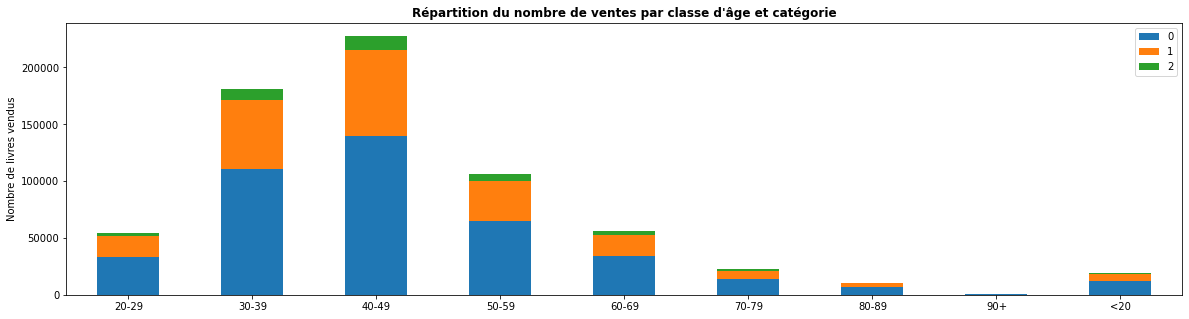

In [133]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,5))



observed1.plot(kind='bar', ylabel="Nombre de livres vendus", stacked=True, ax=ax1)
ax1.set_title("Répartition du nombre de ventes par classe d'âge et catégorie", fontweight ="bold")
ax1.set_xlabel(None)
ax1.tick_params(axis='x', labelrotation = 0)
plt.show()

On remarque qu’on a un chiffre d’affaires assez élevé, qui reste stable pendant ces 2 années étudié malgré le manque de donnée du mois octobre, et sur quelques produits.
Donc globalement autant de sucé au début que maintenant.